# Trabajo de Fin de Grado (Jupyter Notebook)

**Universidad**: *Universidad de Las Palmas de Gran Canaria.*

**Titulación**: *Grado en Ingeniería Informática.*

**Título**: *Verificación en escenarios multinivel con presencia de robots asistentes.*

**Autor**: Kevin David Rosales Santana.

**Tutores**: Modesto Fernando Castrillón Santana y José Javier Lorenzo Navarro.

## Índice

[1. Introducción](#1.-Introducción)

[2. Desarrollo](#2.-Desarrollo)

- [2.1 Importe de los módulos](#2.1-Importe-de-los-módulos)
- [2.2 Carga de datos](#2.2-Carga-de-datos-(Módulo-fileindexer))
- [2.3 Generador de *frames*](#2.3-Generador-de-frames-(Módulo-framesgenerator))
- [2.4 Detector de caras](#2.4-Detector-de-caras-(Módulo-facedetector))
- [2.5 *Face embedding*](#2.5-Face-embedding-(Módulo-model))
- [2.6 Verificación mediante umbral y evaluación de resultados](#2.6-Verificación-mediante-umbral-y-evaluación-de-resultados)
- [2.7 Verificación mediante redes neuronales y evaluación de resultados](#2.7-Verificación-mediante-redes-neuronales-y-evaluación-de-resultados-(Módulo-verifiermodel))

[3. Conclusión](#3.-Conclusión)

## 1. Introducción

Este **cuaderno *Jupyter*** trata del desarrollo del proyecto sobre parte del *dataset* del pasillo (es decir, sobre el **Subconjunto de Vídeos C** mencionado en la memoria del Trabajo de Fin de Grado).

Véase para más información dicha memoria y el Manual de Usuario del proyecto.

## 2. Desarrollo

A continuación, se irá haciendo uso de los distintos módulos desarrollados para el presente Trabajo de Fin de Grado con el fin de construir los distintos prototipos y evaluar sus resultados. 

La implementación interna de cada uno de los dichos módulos puede analizarse en el mismo repositorio del proyecto.

Para más información, se puede consultar la memoria del Trabajo de Fin de Grado y el Manual de Usuario del proyecto.

### 2.1 Importe de los módulos

In [1]:
import random
import os
import numpy
import pickle

from dotenv import load_dotenv
from PIL import Image
from matplotlib import pyplot as plt

from facedetector import mtcnn_detector, dlib_detector
from fileindexer import file_indexer
from framesgenerator import frames_generator
from model import facenet_keras_model, vgg_face_model, embeddings_assembler
from distancematrixcalculator import distances_matrix_loader
from accuracymeter import accuracy_meter
from verifier import verifier
from verifiermodel import nnverifier

from utils import distance_plotter, distance_plotter_boxplot, threshold_plotter, confidence_plotter, \
                  detected_frames_generator, failed_frames_pairs_generator, nn_verifier_metrics_plotter

load_dotenv()
random.seed(os.getenv('RANDOM_SEED'))

Using TensorFlow backend.


### 2.2 Carga de datos (Módulo `fileindexer`)

In [ ]:
file_indexer.create_indexer_files(files_pairs=1, training_identities_number=70, test_identities_number=41,
                                  cameras=(2,5,8), place=3)

In [2]:
""" Floor Place (cameras 2, 5 & 8) """
test_file = 'out/file-indexer/2020_05_10-052057-test.txt'
train_file = 'out/file-indexer/2020_05_10-052057-train.txt'

### 2.3 Generador de *frames* (Módulo `framesgenerator`)

#### 2.3.1 Generador de *frames* para el fichero de entrenamiento

In [3]:
file_indexer_file = open(train_file)
videos = file_indexer_file.readlines()
train_videos_out = list()
for video in videos:
    frames_generator.generate_frames(video.strip())
    train_videos_out.append(os.path.splitext(video.replace("/", "-"))[0] + "/")
file_indexer_file.close()

[Getting frames from video 'D:/averobot/averobot/averobot_floor_01/11_01_03_29_02.mp4']
[Results folder already exists. Existing frames will not be updated]
[Getting frames from video 'D:/averobot/averobot/averobot_floor_02/11_02_03_18_05.mp4']
[Results folder already exists. Existing frames will not be updated]
[Getting frames from video 'D:/averobot/averobot/averobot_floor_03/11_03_03_05_08.mp4']
[Results folder already exists. Existing frames will not be updated]
[Getting frames from video 'D:/averobot/averobot/averobot_floor_01/109_01_03_08_02.mp4']
[Results folder already exists. Existing frames will not be updated]
[Getting frames from video 'D:/averobot/averobot/averobot_floor_02/109_02_03_12_05.mp4']
[Results folder already exists. Existing frames will not be updated]
[Getting frames from video 'D:/averobot/averobot/averobot_floor_03/109_03_03_34_08.mp4']
[Results folder already exists. Existing frames will not be updated]
[Getting frames from video 'D:/averobot/averobot/averob

[Results folder already exists. Existing frames will not be updated]
[Getting frames from video 'D:/averobot/averobot/averobot_floor_01/12_01_03_27_02.mp4']
[Results folder already exists. Existing frames will not be updated]
[Getting frames from video 'D:/averobot/averobot/averobot_floor_02/12_02_03_14_05.mp4']
[Results folder already exists. Existing frames will not be updated]
[Getting frames from video 'D:/averobot/averobot/averobot_floor_03/12_03_03_05_08.mp4']
[Results folder already exists. Existing frames will not be updated]
[Getting frames from video 'D:/averobot/averobot/averobot_floor_01/81_01_03_04_02.mp4']
[Results folder already exists. Existing frames will not be updated]
[Getting frames from video 'D:/averobot/averobot/averobot_floor_02/81_02_03_10_05.mp4']
[Results folder already exists. Existing frames will not be updated]
[Getting frames from video 'D:/averobot/averobot/averobot_floor_03/81_03_03_18_08.mp4']
[Results folder already exists. Existing frames will not b

[Results folder already exists. Existing frames will not be updated]
[Getting frames from video 'D:/averobot/averobot/averobot_floor_02/49_02_03_28_05.mp4']
[Results folder already exists. Existing frames will not be updated]
[Getting frames from video 'D:/averobot/averobot/averobot_floor_03/49_03_03_22_08.mp4']
[Results folder already exists. Existing frames will not be updated]
[Getting frames from video 'D:/averobot/averobot/averobot_floor_01/18_01_03_10_02.mp4']
[Results folder already exists. Existing frames will not be updated]
[Getting frames from video 'D:/averobot/averobot/averobot_floor_02/18_02_03_16_05.mp4']
[Results folder already exists. Existing frames will not be updated]
[Getting frames from video 'D:/averobot/averobot/averobot_floor_03/18_03_03_08_08.mp4']
[Results folder already exists. Existing frames will not be updated]
[Getting frames from video 'D:/averobot/averobot/averobot_floor_01/106_01_03_08_02.mp4']
[Results folder already exists. Existing frames will not 

#### 2.3.2 Generador de *frames* para el fichero de test

In [4]:
file_indexer_file = open(test_file)
videos = file_indexer_file.readlines()
test_videos_out = list()
for video in videos:
    frames_generator.generate_frames(video.strip())
    test_videos_out.append(os.path.splitext(video.replace("/", "-"))[0] + "/")
file_indexer_file.close()

[Getting frames from video 'D:/averobot/averobot/averobot_floor_01/01_01_03_04_02.mp4']
[Results folder already exists. Existing frames will not be updated]
[Getting frames from video 'D:/averobot/averobot/averobot_floor_02/01_02_03_12_05.mp4']
[Results folder already exists. Existing frames will not be updated]
[Getting frames from video 'D:/averobot/averobot/averobot_floor_03/01_03_03_27_08.mp4']
[Results folder already exists. Existing frames will not be updated]
[Getting frames from video 'D:/averobot/averobot/averobot_floor_01/78_01_03_29_02.mp4']
[Results folder already exists. Existing frames will not be updated]
[Getting frames from video 'D:/averobot/averobot/averobot_floor_02/78_02_03_04_05.mp4']
[Results folder already exists. Existing frames will not be updated]
[Getting frames from video 'D:/averobot/averobot/averobot_floor_03/78_03_03_25_08.mp4']
[Results folder already exists. Existing frames will not be updated]
[Getting frames from video 'D:/averobot/averobot/averobot_

[Results folder already exists. Existing frames will not be updated]
[Getting frames from video 'D:/averobot/averobot/averobot_floor_02/15_02_03_12_05.mp4']
[Results folder already exists. Existing frames will not be updated]
[Getting frames from video 'D:/averobot/averobot/averobot_floor_03/15_03_03_03_08.mp4']
[Results folder already exists. Existing frames will not be updated]
[Getting frames from video 'D:/averobot/averobot/averobot_floor_01/107_01_03_08_02.mp4']
[Results folder already exists. Existing frames will not be updated]
[Getting frames from video 'D:/averobot/averobot/averobot_floor_02/107_02_03_29_05.mp4']
[Results folder already exists. Existing frames will not be updated]
[Getting frames from video 'D:/averobot/averobot/averobot_floor_03/107_03_03_28_08.mp4']
[Results folder already exists. Existing frames will not be updated]
[Getting frames from video 'D:/averobot/averobot/averobot_floor_01/40_01_03_01_02.mp4']
[Results folder already exists. Existing frames will no

[Results folder already exists. Existing frames will not be updated]
[Getting frames from video 'D:/averobot/averobot/averobot_floor_03/79_03_03_08_08.mp4']
[Results folder already exists. Existing frames will not be updated]
[Getting frames from video 'D:/averobot/averobot/averobot_floor_01/108_01_03_08_02.mp4']
[Results folder already exists. Existing frames will not be updated]
[Getting frames from video 'D:/averobot/averobot/averobot_floor_02/108_02_03_02_05.mp4']
[Results folder already exists. Existing frames will not be updated]
[Getting frames from video 'D:/averobot/averobot/averobot_floor_03/108_03_03_20_08.mp4']
[Results folder already exists. Existing frames will not be updated]
[Getting frames from video 'D:/averobot/averobot/averobot_floor_01/33_01_03_25_02.mp4']
[Results folder already exists. Existing frames will not be updated]
[Getting frames from video 'D:/averobot/averobot/averobot_floor_02/33_02_03_32_05.mp4']
[Results folder already exists. Existing frames will no

### 2.4 Detector de caras (Módulo `facedetector`)

#### 2.4.1 Detección de caras usando MTCNN (`mtcnn_detector.py`)

#### 2.4.1.1 Detección de caras para el entrenamiento

In [5]:
mtcnn_d = mtcnn_detector.MTCNNDetector(max_detections=4, pickle_results=True, image_results=False, force_update=False, 
                                       normalize_face='resize', confidence_range=0.00001)

for video in train_videos_out:
    mtcnn_d.process_video(video.strip())

[Detecting faces from 'D:/TFG/out/frames-generator/averobot_floor_01-11_01_03_29_02/']
[Results already exists. Existing results will not be updated]
[Detecting faces from 'D:/TFG/out/frames-generator/averobot_floor_02-11_02_03_18_05/']
[Results already exists. Existing results will not be updated]
[Detecting faces from 'D:/TFG/out/frames-generator/averobot_floor_03-11_03_03_05_08/']
[Results already exists. Existing results will not be updated]
[Detecting faces from 'D:/TFG/out/frames-generator/averobot_floor_01-109_01_03_08_02/']
[Results already exists. Existing results will not be updated]
[Detecting faces from 'D:/TFG/out/frames-generator/averobot_floor_02-109_02_03_12_05/']
[Results already exists. Existing results will not be updated]
[Detecting faces from 'D:/TFG/out/frames-generator/averobot_floor_03-109_03_03_34_08/']
[Results already exists. Existing results will not be updated]
[Detecting faces from 'D:/TFG/out/frames-generator/averobot_floor_01-43_01_03_16_02/']
[Results a

[Results already exists. Existing results will not be updated]
[Detecting faces from 'D:/TFG/out/frames-generator/averobot_floor_01-67_01_03_27_02/']
[Results already exists. Existing results will not be updated]
[Detecting faces from 'D:/TFG/out/frames-generator/averobot_floor_02-67_02_03_11_05/']
[Results already exists. Existing results will not be updated]
[Detecting faces from 'D:/TFG/out/frames-generator/averobot_floor_03-67_03_03_33_08/']
[Results already exists. Existing results will not be updated]
[Detecting faces from 'D:/TFG/out/frames-generator/averobot_floor_01-22_01_03_04_02/']
[Results already exists. Existing results will not be updated]
[Detecting faces from 'D:/TFG/out/frames-generator/averobot_floor_02-22_02_03_30_05/']
[Results already exists. Existing results will not be updated]
[Detecting faces from 'D:/TFG/out/frames-generator/averobot_floor_03-22_03_03_31_08/']
[Results already exists. Existing results will not be updated]
[Detecting faces from 'D:/TFG/out/fra

#### 2.4.1.2 Detección de caras para el test

In [6]:
mtcnn_d = mtcnn_detector.MTCNNDetector(max_detections=4, pickle_results=True, image_results=False, force_update=False, 
                                       normalize_face='resize', confidence_range=0.00001)

for video in test_videos_out:
    mtcnn_d.process_video(video.strip())

[Detecting faces from 'D:/TFG/out/frames-generator/averobot_floor_01-01_01_03_04_02/']
[Results already exists. Existing results will not be updated]
[Detecting faces from 'D:/TFG/out/frames-generator/averobot_floor_02-01_02_03_12_05/']
[Results already exists. Existing results will not be updated]
[Detecting faces from 'D:/TFG/out/frames-generator/averobot_floor_03-01_03_03_27_08/']
[Results already exists. Existing results will not be updated]
[Detecting faces from 'D:/TFG/out/frames-generator/averobot_floor_01-78_01_03_29_02/']
[Results already exists. Existing results will not be updated]
[Detecting faces from 'D:/TFG/out/frames-generator/averobot_floor_02-78_02_03_04_05/']
[Results already exists. Existing results will not be updated]
[Detecting faces from 'D:/TFG/out/frames-generator/averobot_floor_03-78_03_03_25_08/']
[Results already exists. Existing results will not be updated]
[Detecting faces from 'D:/TFG/out/frames-generator/averobot_floor_01-35_01_03_28_02/']
[Results alre

[Results already exists. Existing results will not be updated]
[Detecting faces from 'D:/TFG/out/frames-generator/averobot_floor_03-57_03_03_25_08/']
[Results already exists. Existing results will not be updated]
[Detecting faces from 'D:/TFG/out/frames-generator/averobot_floor_01-31_01_03_14_02/']
[Results already exists. Existing results will not be updated]
[Detecting faces from 'D:/TFG/out/frames-generator/averobot_floor_02-31_02_03_24_05/']
[Results already exists. Existing results will not be updated]
[Detecting faces from 'D:/TFG/out/frames-generator/averobot_floor_03-31_03_03_02_08/']
[Results already exists. Existing results will not be updated]
[Detecting faces from 'D:/TFG/out/frames-generator/averobot_floor_01-51_01_03_28_02/']
[Results already exists. Existing results will not be updated]
[Detecting faces from 'D:/TFG/out/frames-generator/averobot_floor_02-51_02_03_02_05/']
[Results already exists. Existing results will not be updated]
[Detecting faces from 'D:/TFG/out/fra

#### 2.4.2 Generación de los *frames* con caras usadas en el *embedding* para evitar volver a detectar todos los frames de los vídeos (Mediante `utils.detected_frames_generator`)

In [5]:
detected_frames_generator.generate_detected_frames(frames_directory='detected-frames-corridor-new-detections/',
                                                   detector='mtcnn', 
                                                   frames_folders_names=test_videos_out)

[Detected frames have been stored in 'C:/Users/kevin/IdeaProjects/TFG/out/detected-frames-dlib-mmod-floor/']


0

### 2.5 *Face embedding* (Módulo `model`)

#### 2.5.1 *Face embedding* a través de *FaceNet* (Mediante `model.facenet_keras_model`)

In [8]:
fkm = facenet_keras_model.FacenetKerasModel(norm_type='l2', embedding_type='resize', pickle_results=True, csv_results=True, 
                                            print_model_info=False, force_update=True)

for video in test_videos_out:
    data = fkm.predict_data(video, facenet_keras_model.load_pickle_results(video, embedding_type='resize'))

[Getting Face Embeddings from video 'averobot_floor_01-01_01_03_04_02/']
[WARNING: results already exists. Existing results will be updated]
[Face embeddings have been stored in 'D:/TFG/out/model/averobot_floor_01-01_01_03_04_02/']
[Getting Face Embeddings from video 'averobot_floor_02-01_02_03_12_05/']
[WARNING: results already exists. Existing results will be updated]
[Face embeddings have been stored in 'D:/TFG/out/model/averobot_floor_02-01_02_03_12_05/']
[Getting Face Embeddings from video 'averobot_floor_03-01_03_03_27_08/']
[WARNING: results already exists. Existing results will be updated]
[Face embeddings have been stored in 'D:/TFG/out/model/averobot_floor_03-01_03_03_27_08/']
[Getting Face Embeddings from video 'averobot_floor_01-78_01_03_29_02/']
[WARNING: results already exists. Existing results will be updated]
[Face embeddings have been stored in 'D:/TFG/out/model/averobot_floor_01-78_01_03_29_02/']
[Getting Face Embeddings from video 'averobot_floor_02-78_02_03_04_05/']

[Face embeddings have been stored in 'D:/TFG/out/model/averobot_floor_03-05_03_03_27_08/']
[Getting Face Embeddings from video 'averobot_floor_01-08_01_03_29_02/']
[WARNING: results already exists. Existing results will be updated]
[Face embeddings have been stored in 'D:/TFG/out/model/averobot_floor_01-08_01_03_29_02/']
[Getting Face Embeddings from video 'averobot_floor_02-08_02_03_27_05/']
[WARNING: results already exists. Existing results will be updated]
[Face embeddings have been stored in 'D:/TFG/out/model/averobot_floor_02-08_02_03_27_05/']
[Getting Face Embeddings from video 'averobot_floor_03-08_03_03_29_08/']
[WARNING: results already exists. Existing results will be updated]
[Face embeddings have been stored in 'D:/TFG/out/model/averobot_floor_03-08_03_03_29_08/']
[Getting Face Embeddings from video 'averobot_floor_01-80_01_03_29_02/']
[WARNING: results already exists. Existing results will be updated]
[Face embeddings have been stored in 'D:/TFG/out/model/averobot_floor_01

[Face embeddings have been stored in 'D:/TFG/out/model/averobot_floor_03-72_03_03_28_08/']
[Getting Face Embeddings from video 'averobot_floor_01-39_01_03_30_02/']
[WARNING: results already exists. Existing results will be updated]
[Face embeddings have been stored in 'D:/TFG/out/model/averobot_floor_01-39_01_03_30_02/']
[Getting Face Embeddings from video 'averobot_floor_02-39_02_03_19_05/']
[WARNING: results already exists. Existing results will be updated]
[Face embeddings have been stored in 'D:/TFG/out/model/averobot_floor_02-39_02_03_19_05/']
[Getting Face Embeddings from video 'averobot_floor_03-39_03_03_28_08/']
[WARNING: results already exists. Existing results will be updated]
[Face embeddings have been stored in 'D:/TFG/out/model/averobot_floor_03-39_03_03_28_08/']
[Getting Face Embeddings from video 'averobot_floor_01-23_01_03_04_02/']
[WARNING: results already exists. Existing results will be updated]
[Face embeddings have been stored in 'D:/TFG/out/model/averobot_floor_01

[Face embeddings have been stored in 'D:/TFG/out/model/averobot_floor_03-65_03_03_28_08/']
[Getting Face Embeddings from video 'averobot_floor_01-75_01_03_08_02/']
[WARNING: results already exists. Existing results will be updated]
[Face embeddings have been stored in 'D:/TFG/out/model/averobot_floor_01-75_01_03_08_02/']
[Getting Face Embeddings from video 'averobot_floor_02-75_02_03_05_05/']
[WARNING: results already exists. Existing results will be updated]
[Face embeddings have been stored in 'D:/TFG/out/model/averobot_floor_02-75_02_03_05_05/']
[Getting Face Embeddings from video 'averobot_floor_03-75_03_03_10_08/']
[WARNING: results already exists. Existing results will be updated]
[Face embeddings have been stored in 'D:/TFG/out/model/averobot_floor_03-75_03_03_10_08/']
[Getting Face Embeddings from video 'averobot_floor_01-16_01_03_04_02/']
[WARNING: results already exists. Existing results will be updated]
[Face embeddings have been stored in 'D:/TFG/out/model/averobot_floor_01

#### 2.5.2 *Face embedding* a través de *VGGFace2* (Mediante `model.vgg_face_model`)

In [12]:
vfm = vgg_face_model.VGGFaceModel(norm_type='l2', embedding_type='resize', pickle_results=True, csv_results=True,
                                  print_model_info=False, force_update=True)

for video in test_videos_out:
    data = vfm.predict_data(video, vgg_face_model.load_pickle_results(video, embedding_type='resize'))

[Getting Face Embeddings from video 'averobot_floor_01-01_01_03_04_02/']
[WARNING: results already exists. Existing results will be updated]
[Face embeddings have been stored in 'D:/TFG/out/model/averobot_floor_01-01_01_03_04_02/']
[Getting Face Embeddings from video 'averobot_floor_02-01_02_03_12_05/']
[WARNING: results already exists. Existing results will be updated]
[Face embeddings have been stored in 'D:/TFG/out/model/averobot_floor_02-01_02_03_12_05/']
[Getting Face Embeddings from video 'averobot_floor_03-01_03_03_27_08/']
[WARNING: results already exists. Existing results will be updated]
[Face embeddings have been stored in 'D:/TFG/out/model/averobot_floor_03-01_03_03_27_08/']
[Getting Face Embeddings from video 'averobot_floor_01-78_01_03_29_02/']
[WARNING: results already exists. Existing results will be updated]
[Face embeddings have been stored in 'D:/TFG/out/model/averobot_floor_01-78_01_03_29_02/']
[Getting Face Embeddings from video 'averobot_floor_02-78_02_03_04_05/']

[Face embeddings have been stored in 'D:/TFG/out/model/averobot_floor_03-05_03_03_27_08/']
[Getting Face Embeddings from video 'averobot_floor_01-08_01_03_29_02/']
[WARNING: results already exists. Existing results will be updated]
[Face embeddings have been stored in 'D:/TFG/out/model/averobot_floor_01-08_01_03_29_02/']
[Getting Face Embeddings from video 'averobot_floor_02-08_02_03_27_05/']
[WARNING: results already exists. Existing results will be updated]
[Face embeddings have been stored in 'D:/TFG/out/model/averobot_floor_02-08_02_03_27_05/']
[Getting Face Embeddings from video 'averobot_floor_03-08_03_03_29_08/']
[WARNING: results already exists. Existing results will be updated]
[Face embeddings have been stored in 'D:/TFG/out/model/averobot_floor_03-08_03_03_29_08/']
[Getting Face Embeddings from video 'averobot_floor_01-80_01_03_29_02/']
[WARNING: results already exists. Existing results will be updated]
[Face embeddings have been stored in 'D:/TFG/out/model/averobot_floor_01

[Face embeddings have been stored in 'D:/TFG/out/model/averobot_floor_03-72_03_03_28_08/']
[Getting Face Embeddings from video 'averobot_floor_01-39_01_03_30_02/']
[WARNING: results already exists. Existing results will be updated]
[Face embeddings have been stored in 'D:/TFG/out/model/averobot_floor_01-39_01_03_30_02/']
[Getting Face Embeddings from video 'averobot_floor_02-39_02_03_19_05/']
[WARNING: results already exists. Existing results will be updated]
[Face embeddings have been stored in 'D:/TFG/out/model/averobot_floor_02-39_02_03_19_05/']
[Getting Face Embeddings from video 'averobot_floor_03-39_03_03_28_08/']
[WARNING: results already exists. Existing results will be updated]
[Face embeddings have been stored in 'D:/TFG/out/model/averobot_floor_03-39_03_03_28_08/']
[Getting Face Embeddings from video 'averobot_floor_01-23_01_03_04_02/']
[WARNING: results already exists. Existing results will be updated]
[Face embeddings have been stored in 'D:/TFG/out/model/averobot_floor_01

[Face embeddings have been stored in 'D:/TFG/out/model/averobot_floor_03-65_03_03_28_08/']
[Getting Face Embeddings from video 'averobot_floor_01-75_01_03_08_02/']
[WARNING: results already exists. Existing results will be updated]
[Face embeddings have been stored in 'D:/TFG/out/model/averobot_floor_01-75_01_03_08_02/']
[Getting Face Embeddings from video 'averobot_floor_02-75_02_03_05_05/']
[WARNING: results already exists. Existing results will be updated]
[Face embeddings have been stored in 'D:/TFG/out/model/averobot_floor_02-75_02_03_05_05/']
[Getting Face Embeddings from video 'averobot_floor_03-75_03_03_10_08/']
[WARNING: results already exists. Existing results will be updated]
[Face embeddings have been stored in 'D:/TFG/out/model/averobot_floor_03-75_03_03_10_08/']
[Getting Face Embeddings from video 'averobot_floor_01-16_01_03_04_02/']
[WARNING: results already exists. Existing results will be updated]
[Face embeddings have been stored in 'D:/TFG/out/model/averobot_floor_01

#### 2.5.3 Guardado de todos los *embeddings* en un solo dataframe de *Pandas* con metadatos (Mediante `model.embeddings_assembler`)

In [14]:
embeddings_assembler.assemble_embeddings(test_videos_out, embedding_type='resize', pickle_results=True,
csv_results=True, name='vggface_resize_corridor_place_2_5_8_test')

[Embeddings Pandas DataFrame has been stored in 'D:/TFG/out/embeddings-assembler/']


,video_id,id,floor,0,1,2,3,4,5,6,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,averobot_floor_01-01_01_03_04_02/,1.0,1.0,0.018635,0.000374,0.00000,0.062410,0.000805,0.000859,0.00000,...,0.000138,0.000000,0.000000,0.018154,0.008430,0.001007,0.000000,0.009475,0.001521,0.000000
1,averobot_floor_01-01_01_03_04_02/,1.0,1.0,0.013268,0.005206,0.00000,0.079554,0.001685,0.003910,0.00000,...,0.000018,0.000000,0.000162,0.009802,0.006452,0.000000,0.000000,0.006952,0.000000,0.000000
2,averobot_floor_01-01_01_03_04_02/,1.0,1.0,0.003667,0.004575,0.00000,0.066522,0.000000,0.002890,0.00000,...,0.000000,0.000000,0.000000,0.006175,0.003686,0.003444,0.000000,0.000331,0.000169,0.000000
3,averobot_floor_01-01_01_03_04_02/,1.0,1.0,0.006698,0.031580,0.00000,0.074799,0.000000,0.001846,0.00000,...,0.000000,0.000000,0.000000,0.009199,0.025743,0.016579,0.000000,0.000934,0.002715,0.000000
4,averobot_floor_02-01_02_03_12_05/,1.0,2.0,0.043070,0.000548,0.00000,0.015670,0.000000,0.000525,0.00000,...,0.000000,0.000031,0.003805,0.000000,0.053167,0.000000,0.000000,0.027057,0.005273,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
487,averobot_floor_02-33_02_03_32_05/,33.0,2.0,0.000000,0.016695,0.00000,0.011425,0.004011,0.000000,0.00000,...,0.000049,0.000000,0.000000,0.023987,0.000000,0.007672,0.003817,0.006394,0.006575,0.000000
488,averobot_floor_03-33_03_03_05_08/,33.0,3.0,0.000000,0.000000,0.00000,0.004466,0.004160,0.003336,0.00000,...,0.006968,0.000000,0.000000,0.000000,0.000000,0.052656,0.095413,0.000000,0.000014,0.008845
489,averobot_floor_03-33_03_03_05_08/,33.0,3.0,0.000000,0.000616,0.00000,0.000000,0.004264,0.018021,0.00000,...,0.000652,0.000000,0.000000,0.000000,0.000000,0.033023,0.124465,0.006058,0.000000,0.000000
490,averobot_floor_03-33_03_03_05_08/,33.0,3.0,0.000686,0.000105,0.00004,0.010907,0.000099,0.011581,0.00000,...,0.014813,0.000000,0.004298,0.000794,0.000000,0.007456,0.105599,0.000000,0.000000,0.016540


### 2.6 Verificación mediante umbral y evaluación de resultados

En esta sección se recogerá el **mejor prototipo estudiado en el fichero `main-lift.ipynb`** para la verificación basada en umbral de distancia (**modelo 10 del apartado 7.1.3** de la memoria) con el fin de observar su comportamiento en el **Subconjunto de Vídeos C.**

#### 2.6.1 Evaluación de detección con *MTCNN* con redimensión de la imagen detectada y *embeddings* con 'l2' usando *VGGFace2 (ResNet50)* en lugar de *FaceNet*

##### 2.6.1.1 Carga de distancias euclídeas a través de los descriptores del dataframe construido (Módulo `distancematrixcalculator`)

In [2]:
resize_face_embeddings_train = embeddings_assembler.load_panda_embeddings('2020-07-02_19-42-44-745821-vggface_resize_corridor_place_2_5_8_train-data-resize.pickle')
# [same_video_results_list, same_video_euclidean_distance_list] = distances_matrix_loader.get_same_video_distance_matrices(resize_face_embeddings_train)
[same_person_results_list, same_person_euclidean_distance_list] = distances_matrix_loader.get_same_person_distance_matrices(resize_face_embeddings_train)
[different_people_results_list, different_people_euclidean_distance_list] = distances_matrix_loader.get_different_people_distance_matrices(resize_face_embeddings_train)


##### 2.6.1.2 Visualización de rangos de distancias euclídeas (Mediante `utils.distance_plotter`)

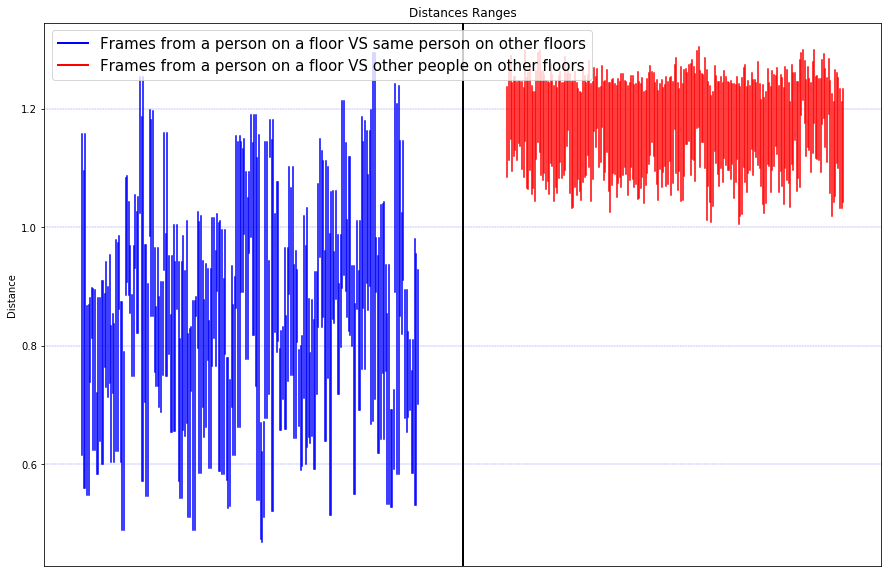

In [3]:
dp = distance_plotter.DistancePlotter(# same_video_results_list,
                                      same_person_results_list,
                                      different_people_results_list)
dp.draw_plot()

##### 2.6.1.3 Visualización de rangos de distancias euclídeas con *Boxplot* (Mediante `utils.distance_plotter_boxplot`)

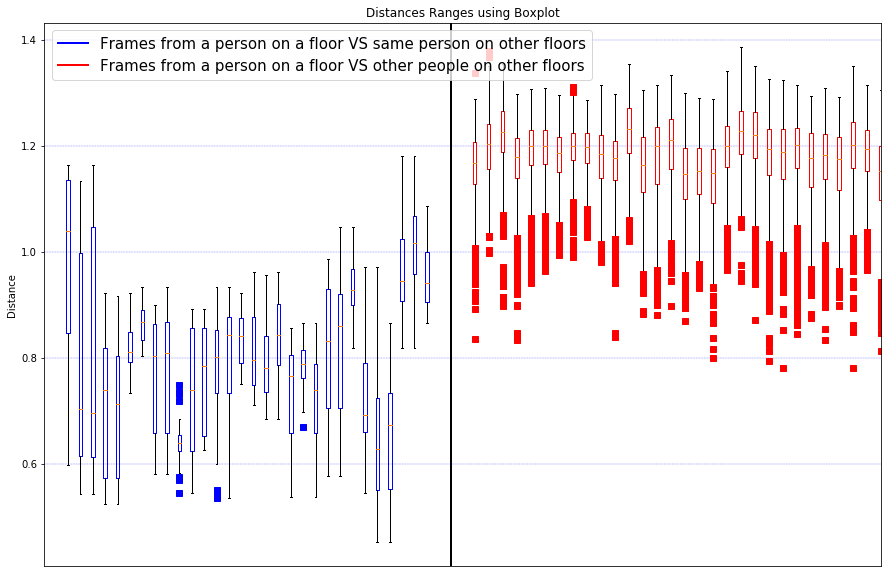

In [4]:
dpb = distance_plotter_boxplot.DistancePlotterBoxplot(# same_video_euclidean_distance_list[:30],
                                                      same_person_euclidean_distance_list[:30],
                                                      different_people_euclidean_distance_list[:30])

dpb.draw_plot()


##### 2.6.1.4 Visualización de rangos de distancias euclídeas concentradas en únicamente dos *Boxplot* (Mediante `utils.distance_plotter_boxplot`)

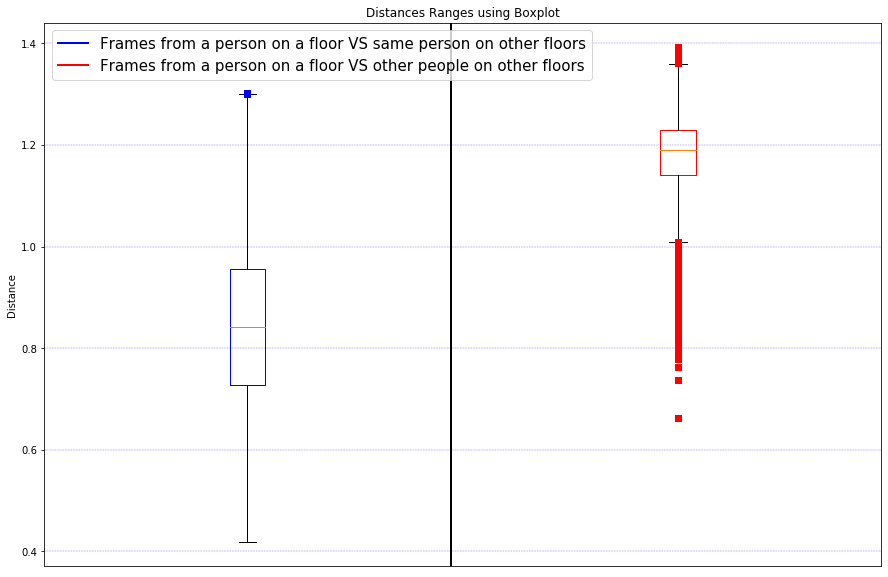

In [5]:
dpb = distance_plotter_boxplot.DistancePlotterBoxplot(# numpy.concatenate(same_video_euclidean_distance_list),
                                                      numpy.concatenate(same_person_euclidean_distance_list),
                                                      numpy.concatenate(different_people_euclidean_distance_list))
dpb.draw_plot()


##### 2.6.1.5 Cálculo del mejor umbral a través de *FAR*, *FRR* y *EER* (Módulo `thresholdvalidator` mediante `utils.threshold_plotter`)

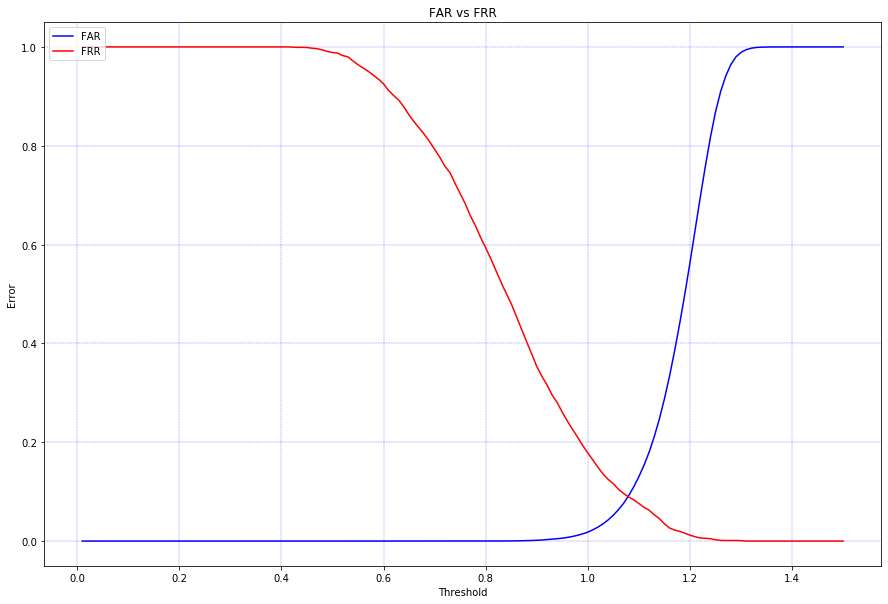


Best threshold: 1.08
EER: 0.092


In [6]:
tp = threshold_plotter.ThresholdPlotter(resize_face_embeddings_train, threshold_min=0.01, threshold_max=1.5)

tp.draw_plot()

best_threshold, eer = tp.calculate_best_threshold_and_eer() 

print("\nBest threshold:", best_threshold)
print("EER:", eer)

##### Obtención del dataframe y de pares de vídeos de personas iguales y distintas para el *dataset* formado por zonas del pasillo en cámaras 2, 5 y 8 (test)

In [2]:
resize_face_embeddings_test = embeddings_assembler.load_panda_embeddings('2020-07-02_19-43-04-727954-vggface_resize_corridor_place_2_5_8_test-data-resize.pickle')
same_person_videos_id_pairs_list_test = accuracy_meter.get_same_person_videos_ids_pairs(resize_face_embeddings_test)
different_person_videos_id_pairs_list_test = accuracy_meter.get_different_people_videos_ids_pairs(resize_face_embeddings_test)
# Itertools generates different combinations each time kernel is started. For this reason, we get the same lists
# ordering them and then shuffle each one with the same random seed.
same_person_videos_id_pairs_list_test.sort()
different_person_videos_id_pairs_list_test.sort()
random.shuffle(same_person_videos_id_pairs_list_test)
random.shuffle(different_person_videos_id_pairs_list_test)
mixed_videos_id_pairs_list_test = same_person_videos_id_pairs_list_test.copy()
mixed_videos_id_pairs_list_test.extend(different_person_videos_id_pairs_list_test)

##### 2.6.1.6 Muestra gráfica del *accuracy* respecto al índice de confianza (Mediante `utils.confidence_plotter`)

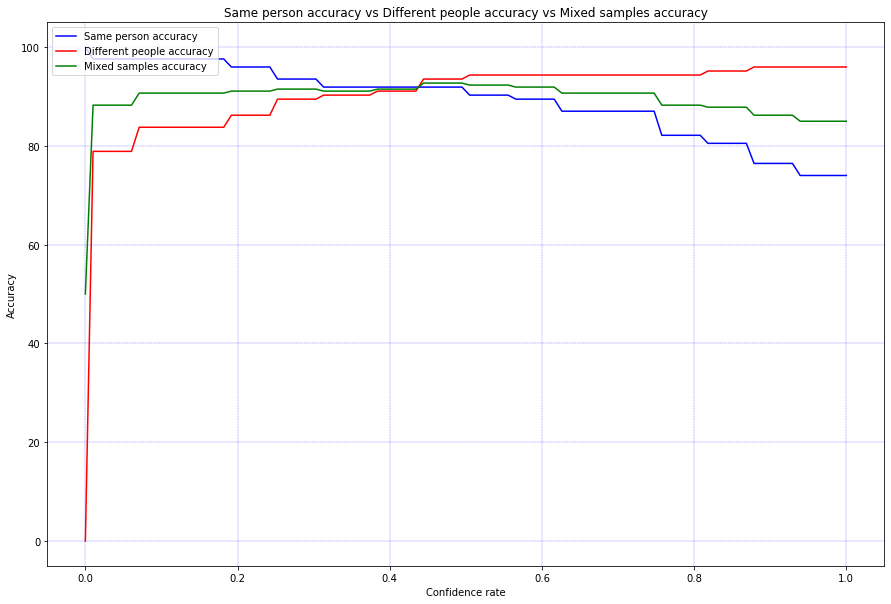


Best confidence rate: 0.384
Same person pairs accuracy:  91.87 %
Different people pairs accuracy:  91.057 %
Accuracy (with same number of same person pairs and different people pairs): 91.463 %


In [3]:
cp = confidence_plotter.ConfidencePlotter(resize_face_embeddings_test, same_person_videos_id_pairs_list_test,
                                          different_person_videos_id_pairs_list_test[:123], threshold=1.08)

cp.draw_plot()

results = cp.calculate_best_confidence_rate_and_accuracy() 

print("\nBest confidence rate:", results[0])
print("Same person pairs accuracy: ", results[1], "%")
print("Different people pairs accuracy: ", results[2], "%")
print("Accuracy (with same number of same person pairs and different people pairs):", results[3], "%")

##### 2.6.1.7 Medida del *accuracy* con el mejor índice de confianza en pares con misma persona, distinta persona y mezclados (Módulo `accuracymeter`)

In [4]:
same_person_videos_accuracy = accuracy_meter.get_accuracy(resize_face_embeddings_test, 
                                                          same_person_videos_id_pairs_list_test, 
                                                          confidence=0.384,
                                                          threshold=1.08,
                                                          print_iterations=True)

different_person_videos_accuracy = accuracy_meter.get_accuracy(resize_face_embeddings_test, 
                                                               different_person_videos_id_pairs_list_test, 
                                                               confidence=0.384,
                                                               threshold=1.08,
                                                               print_iterations=True)

mixed_videos_accuracy = accuracy_meter.get_accuracy(resize_face_embeddings_test, 
                                                    mixed_videos_id_pairs_list_test, 
                                                    confidence=0.384,
                                                    threshold=1.08,
                                                    print_iterations=True)

print()
print("Same person accuracy: " + str(same_person_videos_accuracy) + " %")
print("Different people accuracy: " + str(different_person_videos_accuracy) + " %")
print("Mixed videos accuracy (with different number of same person pairs and different people pairs): " + str(mixed_videos_accuracy) + " %")

[Getting accuracy (sample 5042/5043)]
Same person accuracy: 91.87 %
Different people accuracy: 92.5 %
Mixed videos accuracy (with different number of same person pairs and different people pairs): 92.485 %


##### 2.6.1.8 Varios test de funcionamiento de la verificación (Módulo `verifier`)

In [61]:
vf = verifier.Verifier(resize_face_embeddings_test, confidence=0.384, threshold=1.08)

sp_vipl_copy = same_person_videos_id_pairs_list_test.copy()
dp_vipl_copy = different_person_videos_id_pairs_list_test.copy()

random.shuffle(sp_vipl_copy)
random.shuffle(dp_vipl_copy)

print("[Same person tests]")

for ids_pair in sp_vipl_copy[:10]:
    isp_result = vf.is_same_person(ids_pair[0], ids_pair[1])
    del isp_result['distance_matrix']
    print("[" + ids_pair[0] + " VS " + ids_pair[1] + ":\t" + str(isp_result) + "]")

print()
print("[Different person tests]")

for ids_pair in dp_vipl_copy[:10]:
    isp_result = vf.is_same_person(ids_pair[0], ids_pair[1])
    del isp_result['distance_matrix']
    print("[" + ids_pair[0] + " VS " + ids_pair[1] + ":\t" + str(isp_result) + "]")

[Same person tests]
[averobot_floor_01-32_01_03_08_02/ VS averobot_floor_03-32_03_03_12_08/:	{'is_same_person': True, 'confidence': 1.0}]
[averobot_floor_01-51_01_03_28_02/ VS averobot_floor_03-51_03_03_11_08/:	{'is_same_person': True, 'confidence': 1.0}]
[averobot_floor_02-107_02_03_29_05/ VS averobot_floor_03-107_03_03_28_08/:	{'is_same_person': True, 'confidence': 1.0}]
[averobot_floor_01-33_01_03_25_02/ VS averobot_floor_03-33_03_03_05_08/:	{'is_same_person': True, 'confidence': 1.0}]
[averobot_floor_01-15_01_03_19_02/ VS averobot_floor_03-15_03_03_03_08/:	{'is_same_person': True, 'confidence': 1.0}]
[averobot_floor_01-108_01_03_08_02/ VS averobot_floor_03-108_03_03_20_08/:	{'is_same_person': False, 'confidence': 0.75}]
[averobot_floor_01-62_01_03_07_02/ VS averobot_floor_03-62_03_03_05_08/:	{'is_same_person': True, 'confidence': 1.0}]
[averobot_floor_02-34_02_03_28_05/ VS averobot_floor_03-34_03_03_11_08/:	{'is_same_person': True, 'confidence': 1.0}]
[averobot_floor_01-05_01_03_01

##### 2.6.1.9 Visualización de pares de frames fallidos (Falso negativo haciendo uso de `utils.failed_frames_pairs_generator`)

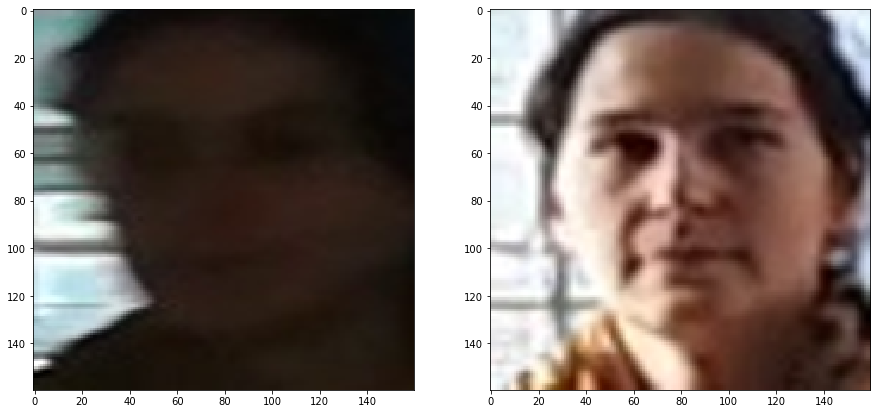

In [63]:
id_video_1 = 'averobot_floor_01-108_01_03_08_02/'
id_video_2 = 'averobot_floor_03-108_03_03_20_08/'

failed_frames_pairs = failed_frames_pairs_generator.get_failed_frames_pairs(id_video_1=id_video_1,
                                                                            id_video_2=id_video_2,
                                                                            same_person=True,
                                                                            distance_matrix=vf.is_same_person(id_video_1, 
                                                                                                              id_video_2)['distance_matrix'],
                                                                            threshold=vf.threshold,
                                                                            used_frames=4,
                                                                            detector='mtcnn')

frame_1 = Image.open(os.getenv('MAIN_ROUTE') + "/out/frames-generator/" + id_video_1 + failed_frames_pairs[0][0])
face_cut_1 = facenet_keras_model.load_pickle_results(id_video_1, embedding_type='resize')
face_box_1 = [face['box'] for index, face in enumerate(face_cut_1) if face['frame_number'] == failed_frames_pairs[0][0]][0]
face_box_1[2] = face_box_1[0] + face_box_1[2]
face_box_1[3] = face_box_1[1] + face_box_1[3]
embedding_frame_1 = frame_1.crop(tuple(face_box_1)).resize([160, 160])

frame_2 = Image.open(os.getenv('MAIN_ROUTE') + "/out/frames-generator/" + id_video_2 + failed_frames_pairs[0][1])
face_cut_2 = facenet_keras_model.load_pickle_results(id_video_2, embedding_type='resize')
face_box_2 = [face['box'] for index, face in enumerate(face_cut_2) if face['frame_number'] == failed_frames_pairs[0][1]][0]
face_box_2[2] = face_box_2[0] + face_box_2[2]
face_box_2[3] = face_box_2[1] + face_box_2[3]
embedding_frame_2 = frame_2.crop(tuple(face_box_2)).resize([160, 160])

plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.imshow(embedding_frame_1)

plt.subplot(1,2,2)
plt.imshow(embedding_frame_2)

##### 2.6.1.10 Visualización de pares de frames fallidos (Falso positivo haciendo uso de `utils.failed_frames_pairs_generator`)

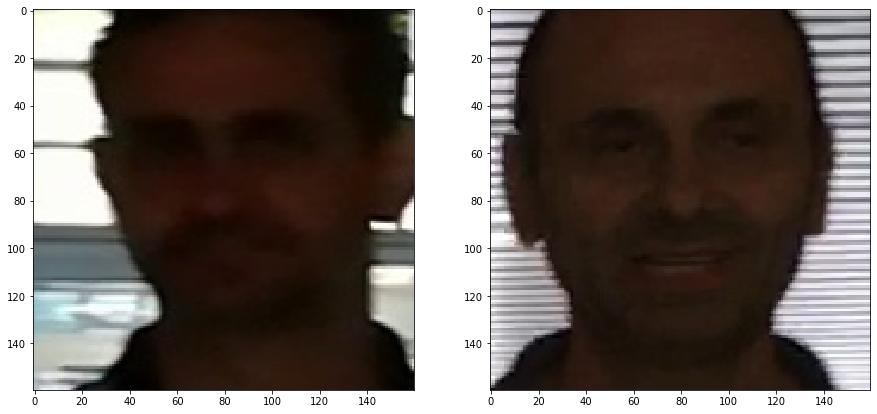

In [64]:
id_video_1 = 'averobot_floor_01-01_01_03_04_02/'
id_video_2 = 'averobot_floor_02-15_02_03_12_05/'

failed_frames_pairs = failed_frames_pairs_generator.get_failed_frames_pairs(id_video_1=id_video_1,
                                                                            id_video_2=id_video_2,
                                                                            same_person=False,
                                                                            distance_matrix=vf.is_same_person(id_video_1, 
                                                                                                              id_video_2)['distance_matrix'],
                                                                            threshold=vf.threshold,
                                                                            used_frames=4,
                                                                            detector='mtcnn')

frame_1 = Image.open(os.getenv('MAIN_ROUTE') + "/out/frames-generator/" + id_video_1 + failed_frames_pairs[0][0])
face_cut_1 = facenet_keras_model.load_pickle_results(id_video_1, embedding_type='resize')
face_box_1 = [face['box'] for index, face in enumerate(face_cut_1) if face['frame_number'] == failed_frames_pairs[0][0]][0]
face_box_1[2] = face_box_1[0] + face_box_1[2]
face_box_1[3] = face_box_1[1] + face_box_1[3]
embedding_frame_1 = frame_1.crop(tuple(face_box_1)).resize([160, 160])

frame_2 = Image.open(os.getenv('MAIN_ROUTE') + "/out/frames-generator/" + id_video_2 + failed_frames_pairs[0][1])
face_cut_2 = facenet_keras_model.load_pickle_results(id_video_2, embedding_type='resize')
face_box_2 = [face['box'] for index, face in enumerate(face_cut_2) if face['frame_number'] == failed_frames_pairs[0][1]][0]
face_box_2[2] = face_box_2[0] + face_box_2[2]
face_box_2[3] = face_box_2[1] + face_box_2[3]
embedding_frame_2 = frame_2.crop(tuple(face_box_2)).resize([160, 160])

plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.imshow(embedding_frame_1)

plt.subplot(1,2,2)
plt.imshow(embedding_frame_2)

### 2.7 Verificación mediante redes neuronales y evaluación de resultados (Módulo `verifiermodel`)

En esta sección se recogerá el **mejor prototipo estudiado en el fichero `main-lift.ipynb`** para la verificación basada en redes neuronales (**modelo 6 del apartado 7.2.3** de la memoria) con el fin de observar su comportamiento en el **Subconjunto de Vídeos C.**

#### 2.7.1 Uso del modelo de resta: 2 *embeddings* (1 por vídeo) aportados por un detector (*MTCNN*) restados entre sí (el *embedding* de una identidad menos el *embedding* de la otra) con valor absoluto en el resultado usando el *Teorema de Kolmogorov*

##### 2.7.1.1 Creación del verificador

In [2]:
nn_vf = nnverifier.NNVerifier(train_videos_embeddings_1=embeddings_assembler.load_panda_embeddings('2020-07-02_19-39-58-451735-facenet_resize_corridor_place_2_5_8_train-data-resize.pickle'),
                              test_videos_embeddings_1=embeddings_assembler.load_panda_embeddings('2020-07-02_19-40-11-292904-facenet_resize_corridor_place_2_5_8_test-data-resize.pickle'),
                              mlp_type='abs_subtract',
                              use_one_detector=True,
                              use_kolmogorov_theorem=True)

##### 2.7.1.2 Obtención de entradas para entrenamiento y test 

In [3]:
[same_person_embeddings_pairs_train, different_people_embeddings_pairs_train] = nn_vf.get_embeddings_pairs(pair_type='train')
[same_person_embeddings_pairs_test, different_people_embeddings_pairs_test] = nn_vf.get_embeddings_pairs(pair_type='test')

[Getting all possible pairs...]
[All pairs have been generated successfully (6720 same person pairs & 463680 different people pairs)
[Getting all possible pairs...]
[All pairs have been generated successfully (3936 same person pairs & 157440 different people pairs)


##### 2.7.1.3 Creación y entrenamiento de la red neuronal

In [45]:
nn_vf.create_mlp(print_summary=True)
nn_vf.train_model(same_person_embeddings_pairs_train, different_people_embeddings_pairs_train, batch_size=2500, epochs=100)

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_49 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_50 (Dense)             (None, 257)               33153     
_________________________________________________________________
dense_51 (Dense)             (None, 1)                 258       
Total params: 49,923
Trainable params: 49,923
Non-trainable params: 0
_________________________________________________________________
Train on 10752 samples, validate on 2688 samples
Epoch 1/100
10752/10752 [==============================] - 0s 17us/step - loss: 0.6897 - accuracy: 0.5233 - val_loss: 0.6881 - val_accuracy: 0.5312
Epoch 2/100
10752/10752 [==============================] - 0s 6us/step - loss: 0.6828 - accuracy: 0.5585 - val_loss: 0.6803 - val_accuracy: 0.5711
Epoch 3/100
10752/10752 [==========

Epoch 51/100
10752/10752 [==============================] - 0s 4us/step - loss: 0.5516 - accuracy: 0.7133 - val_loss: 0.5514 - val_accuracy: 0.7132
Epoch 52/100
10752/10752 [==============================] - 0s 4us/step - loss: 0.5115 - accuracy: 0.7573 - val_loss: 0.5478 - val_accuracy: 0.7188
Epoch 53/100
10752/10752 [==============================] - 0s 4us/step - loss: 0.5632 - accuracy: 0.6932 - val_loss: 0.5566 - val_accuracy: 0.7117
Epoch 54/100
10752/10752 [==============================] - 0s 4us/step - loss: 0.5076 - accuracy: 0.7596 - val_loss: 0.5530 - val_accuracy: 0.7128
Epoch 55/100
10752/10752 [==============================] - 0s 4us/step - loss: 0.5440 - accuracy: 0.7055 - val_loss: 0.5710 - val_accuracy: 0.6920
Epoch 56/100
10752/10752 [==============================] - 0s 4us/step - loss: 0.5208 - accuracy: 0.7385 - val_loss: 0.5502 - val_accuracy: 0.7124
Epoch 57/100
10752/10752 [==============================] - 0s 4us/step - loss: 0.5232 - accuracy: 0.7322 - val_

##### 2.7.1.4 Guardado de la red neuronal

In [51]:
nn_vf.save_model('abs_subtract_od_kolmogorov_corridor')

##### 2.7.1.5 Carga de la red neuronal

In [3]:
nn_vf.load_model('2020-07-05_22-44-20-591023-abs_subtract_od_kolmogorov_corridor.h5')

##### 2.7.1.6 *Accuracy*  y *Loss* del conjunto de test

In [49]:
nn_vf.evaluate(same_person_embeddings_pairs_test, different_people_embeddings_pairs_test)

7872/7872 [==============================] - 0s 41us/step
Accuracy: 0.592 | Loss: 0.79


##### 2.7.1.7 Calidad de la red neuronal (Mediante `utils.nn_verifier_metrics_plotter`)

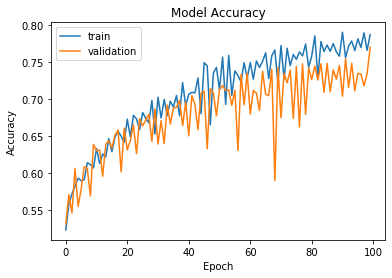

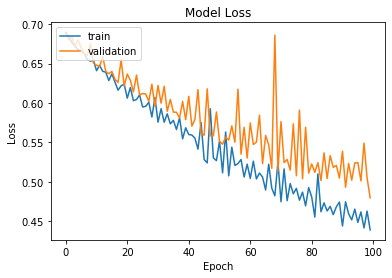

In [50]:
nn_vf_mp = nn_verifier_metrics_plotter.NNVerifierMetricsPlotter(nn_vf.history)

nn_vf_mp.plot_accuracy()
nn_vf_mp.plot_loss()

##### 2.7.1.8 Varios test de funcionamiento de la verificación

Se cargan pares de ids de vídeos de la misma persona y de diferente persona para las pruebas. Estos pares proceden del conjunto de test (ya que se considera el método fundamental de la aplicación final).

In [4]:
same_person_videos_id_pairs_list = accuracy_meter.get_same_person_videos_ids_pairs(nn_vf.test_videos_embeddings_1)
different_person_videos_id_pairs_list = accuracy_meter.get_different_people_videos_ids_pairs(nn_vf.test_videos_embeddings_1)
# Itertools generates different combinations each time kernel is started. For this reason, we get the same lists
# ordering them and then shuffle each one with the same random seed.
same_person_videos_id_pairs_list.sort()
different_person_videos_id_pairs_list.sort()
random.shuffle(same_person_videos_id_pairs_list)
random.shuffle(different_person_videos_id_pairs_list)

In [25]:
sp_vipl_copy = same_person_videos_id_pairs_list.copy()
dp_vipl_copy = different_person_videos_id_pairs_list.copy()

random.shuffle(sp_vipl_copy)
random.shuffle(dp_vipl_copy)

print("[Same person tests]")

for ids_pair in sp_vipl_copy[:10]:
    isp_result = nn_vf.is_same_person(ids_pair[0], ids_pair[1])
    del isp_result['results']
    print("[" + ids_pair[0] + " VS " + ids_pair[1] + ":\t" + str(isp_result) + "]")

print()
print("[Different person tests]")

for ids_pair in dp_vipl_copy[:10]:
    isp_result = nn_vf.is_same_person(ids_pair[0], ids_pair[1])
    del isp_result['results']
    print("[" + ids_pair[0] + " VS " + ids_pair[1] + ":\t" + str(isp_result) + "]")

[Same person tests]
[averobot_floor_02-108_02_03_02_05/ VS averobot_floor_03-108_03_03_20_08/:	{'is_same_person': False, 'confidence': 0.562}]
[averobot_floor_01-08_01_03_29_02/ VS averobot_floor_02-08_02_03_27_05/:	{'is_same_person': True, 'confidence': 0.688}]
[averobot_floor_02-10_02_03_25_05/ VS averobot_floor_03-10_03_03_20_08/:	{'is_same_person': False, 'confidence': 1.0}]
[averobot_floor_02-73_02_03_11_05/ VS averobot_floor_03-73_03_03_34_08/:	{'is_same_person': True, 'confidence': 0.5}]
[averobot_floor_01-72_01_03_08_02/ VS averobot_floor_02-72_02_03_34_05/:	{'is_same_person': True, 'confidence': 0.875}]
[averobot_floor_01-107_01_03_08_02/ VS averobot_floor_02-107_02_03_29_05/:	{'is_same_person': True, 'confidence': 0.5}]
[averobot_floor_01-16_01_03_04_02/ VS averobot_floor_02-16_02_03_30_05/:	{'is_same_person': False, 'confidence': 1.0}]
[averobot_floor_01-34_01_03_27_02/ VS averobot_floor_03-34_03_03_11_08/:	{'is_same_person': True, 'confidence': 1.0}]
[averobot_floor_01-97_0

##### 2.7.1.9 Visualización de pares de frames fallidos (Falso negativo haciendo uso de `utils.failed_frames_pairs_generator`)

Failed frames pair example: ('frame-196.jpg', 'frame-046.jpg')


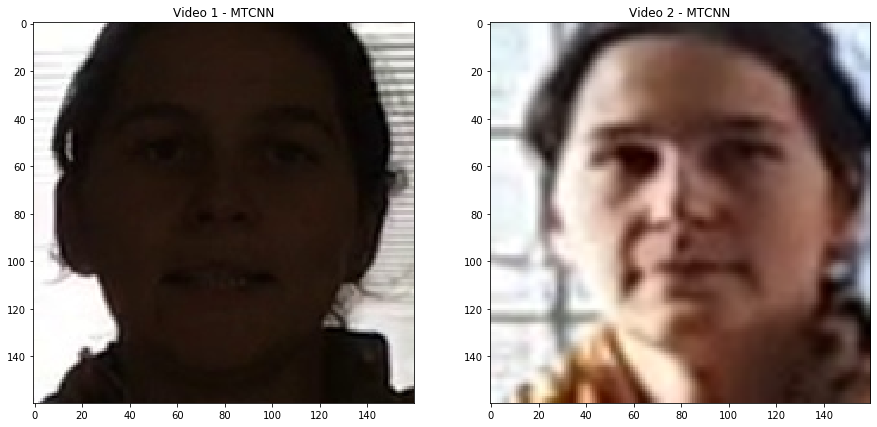

In [45]:
id_video_1 = 'averobot_floor_02-108_02_03_02_05/'
id_video_2 = 'averobot_floor_03-108_03_03_20_08/'
failed_frames_pairs = failed_frames_pairs_generator.get_nn_failed_frames_pairs(id_video_1=id_video_1,
                                                                               id_video_2=id_video_2,
                                                                               same_person=True,
                                                                               predict_results=nn_vf.is_same_person(id_video_1, 
                                                                                                                    id_video_2)['results'],
                                                                               used_frames_detector_1=4,
                                                                               detector_1='mtcnn',
                                                                               use_one_detector=True)

used_index = random.randint(0, len(failed_frames_pairs) - 1)
print("Failed frames pair example:", failed_frames_pairs[used_index])

frame_1 = Image.open(os.getenv('MAIN_ROUTE') + "/out/frames-generator/" + id_video_1 + failed_frames_pairs[used_index][0])
face_cut_1 = facenet_keras_model.load_pickle_results(id_video_1, embedding_type='resize')
face_box_1 = [face['box'] for index, face in enumerate(face_cut_1) if face['frame_number'] == failed_frames_pairs[used_index][0]][0]
face_box_1[2] = face_box_1[0] + face_box_1[2]
face_box_1[3] = face_box_1[1] + face_box_1[3]
embedding_frame_1 = frame_1.crop(tuple(face_box_1)).resize([160, 160])

frame_2 = Image.open(os.getenv('MAIN_ROUTE') + "/out/frames-generator/" + id_video_2 + failed_frames_pairs[used_index][1])
face_cut_2 = facenet_keras_model.load_pickle_results(id_video_2, embedding_type='resize')
face_box_2 = [face['box'] for index, face in enumerate(face_cut_2) if face['frame_number'] == failed_frames_pairs[used_index][1]][0]
face_box_2[2] = face_box_2[0] + face_box_2[2]
face_box_2[3] = face_box_2[1] + face_box_2[3]
embedding_frame_2 = frame_2.crop(tuple(face_box_2)).resize([160, 160])

plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.title("Video 1 - MTCNN")
plt.imshow(embedding_frame_1)

plt.subplot(1,2,2)
plt.title("Video 2 - MTCNN")
plt.imshow(embedding_frame_2)

##### 2.7.1.10 Visualización de pares de frames fallidos (Falso positivo haciendo uso de `utils.failed_frames_pairs_generator`)

Failed frames pair example: ('frame-091.jpg', 'frame-025.jpg')


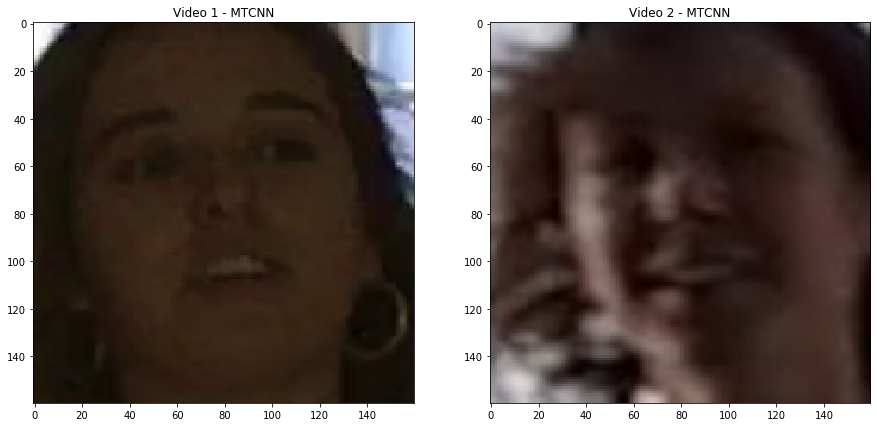

In [38]:
id_video_1 = 'averobot_floor_02-62_02_03_14_05/'
id_video_2 = 'averobot_floor_03-79_03_03_08_08/'
failed_frames_pairs = failed_frames_pairs_generator.get_nn_failed_frames_pairs(id_video_1=id_video_1,
                                                                               id_video_2=id_video_2,
                                                                               same_person=False,
                                                                               predict_results=nn_vf.is_same_person(id_video_1, 
                                                                                                                    id_video_2)['results'],
                                                                               used_frames_detector_1=4,
                                                                               detector_1='mtcnn',
                                                                               use_one_detector=True)

used_index = random.randint(0, len(failed_frames_pairs) - 1)
print("Failed frames pair example:", failed_frames_pairs[used_index])

frame_1 = Image.open(os.getenv('MAIN_ROUTE') + "/out/frames-generator/" + id_video_1 + failed_frames_pairs[used_index][0])
face_cut_1 = facenet_keras_model.load_pickle_results(id_video_1, embedding_type='resize')
face_box_1 = [face['box'] for index, face in enumerate(face_cut_1) if face['frame_number'] == failed_frames_pairs[used_index][0]][0]
face_box_1[2] = face_box_1[0] + face_box_1[2]
face_box_1[3] = face_box_1[1] + face_box_1[3]
embedding_frame_1 = frame_1.crop(tuple(face_box_1)).resize([160, 160])

frame_2 = Image.open(os.getenv('MAIN_ROUTE') + "/out/frames-generator/" + id_video_2 + failed_frames_pairs[used_index][1])
face_cut_2 = facenet_keras_model.load_pickle_results(id_video_2, embedding_type='resize')
face_box_2 = [face['box'] for index, face in enumerate(face_cut_2) if face['frame_number'] == failed_frames_pairs[used_index][1]][0]
face_box_2[2] = face_box_2[0] + face_box_2[2]
face_box_2[3] = face_box_2[1] + face_box_2[3]
embedding_frame_2 = frame_2.crop(tuple(face_box_2)).resize([160, 160])

plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.title("Video 1 - MTCNN")
plt.imshow(embedding_frame_1)

plt.subplot(1,2,2)
plt.title("Video 2 - MTCNN")
plt.imshow(embedding_frame_2)

## 3. Conclusión

En conclusión, este estudio sobre el **Subconjunto de Vídeos C** (parte del *dataset* ubicada en el pasillo) muestra cómo el mejor sistema de verificación basado en umbral de distancia sigue comportándose de manera bastante satisfactoria en entornos más complejos (como se puede ver en la calidad de los fotogramas que contiene).

Sin embargo, se puede analizar cómo el mejor sistema de verificación basado en redes neuronales no mantiene tanto su calidad cuando se trata de entornos más difíciles de manejar.

**Los prototipos usados en este cuaderno *Jupyter* serán usados en el resto de cuadernos con la finalidad de continuar estudiando su comportamiento en entornos más complejos.**

Se podrán visualizar los resultados de los mejores sistemas en todos los subconjuntos de vídeos elegidos en la **sección 7.3** de la memoria.

El resto de conclusiones se pueden encontrar en la memoria del Trabajo de Fin de Grado (concretamente, en el **Capítulo 8**).